In [2]:
# =========================================
# 1) Imports
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

In [3]:
# ==============================
# 📌 2. Load Dataset
# ==============================
file_path = "Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

In [4]:
# Display dataset shape & first rows
print("Shape:", df.shape)
print(df.head())

Shape: (7043, 33)
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Mo

In [5]:
# ==============================
# 📌 3. Basic Info
# ==============================
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service 

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [7]:
# ==============================
# 📌 4. Data Cleaning
# ==============================
# Convert 'Total Charges' to numeric (sometimes it’s string)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Handle missing values in 'Total Charges' if any
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

# Drop irrelevant columns for churn analysis
df_clean = df.drop(columns=['CustomerID','Count','Lat Long','Latitude','Longitude','Churn Reason'])


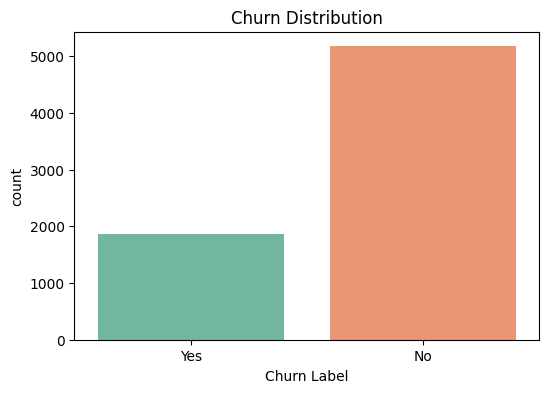

In [8]:
# ==============================
# 📌 5. EDA - Exploratory Analysis
# ==============================
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Churn Label', palette='Set2')
plt.title("Churn Distribution")
plt.show()

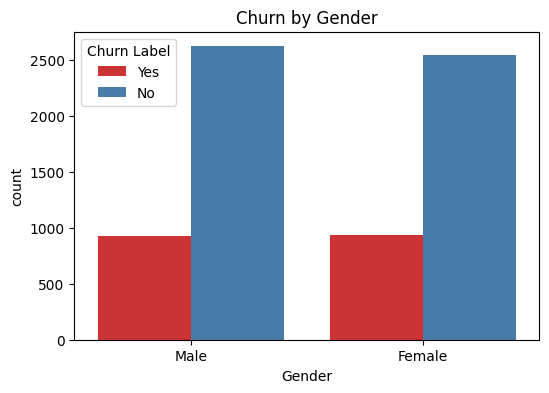

In [9]:
# Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Gender', hue='Churn Label', palette='Set1')
plt.title("Churn by Gender")
plt.show()

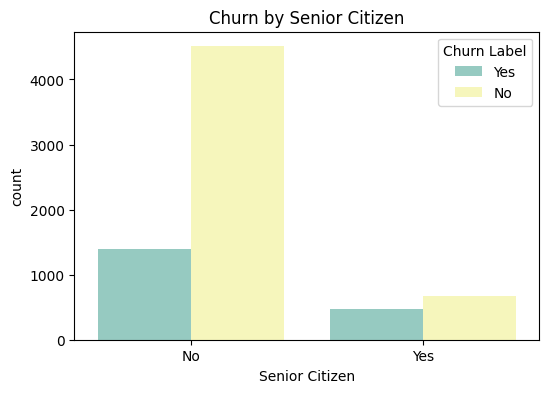

In [10]:
# Senior Citizen vs Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Senior Citizen', hue='Churn Label', palette='Set3')
plt.title("Churn by Senior Citizen")
plt.show()


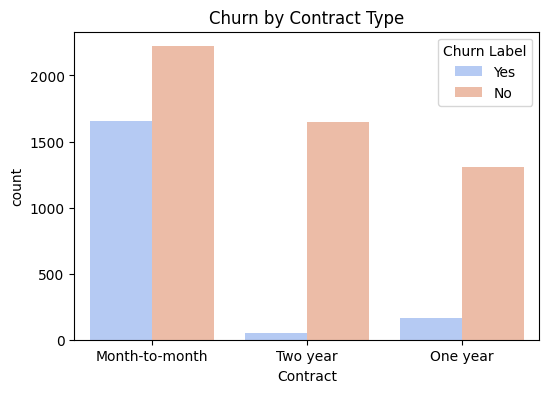

In [11]:
# Contract type vs Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Contract', hue='Churn Label', palette='coolwarm')
plt.title("Churn by Contract Type")
plt.show()

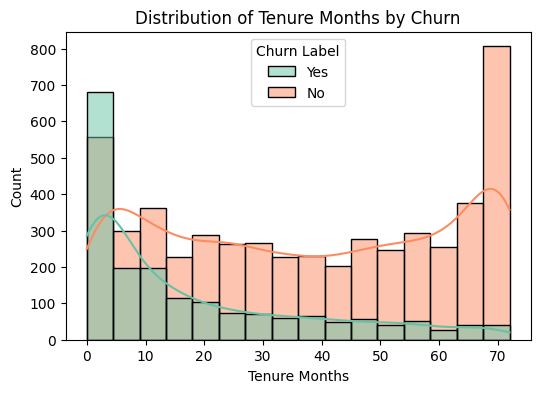

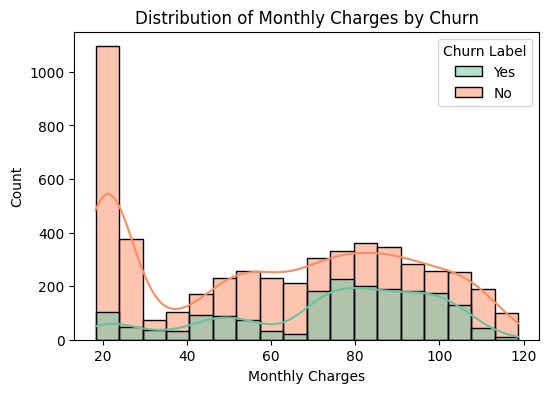

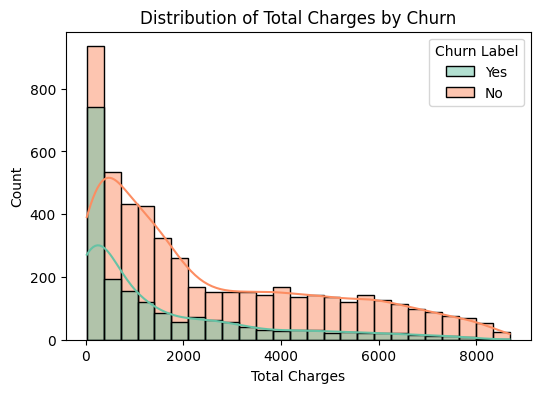

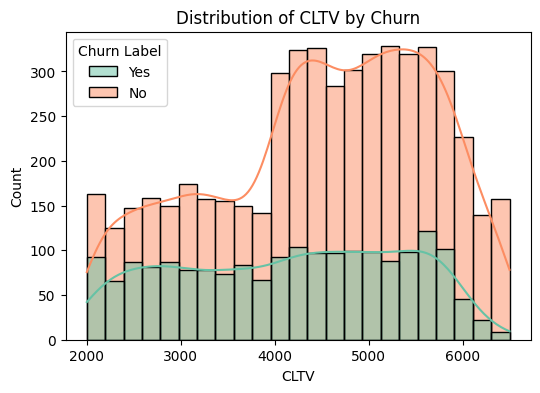

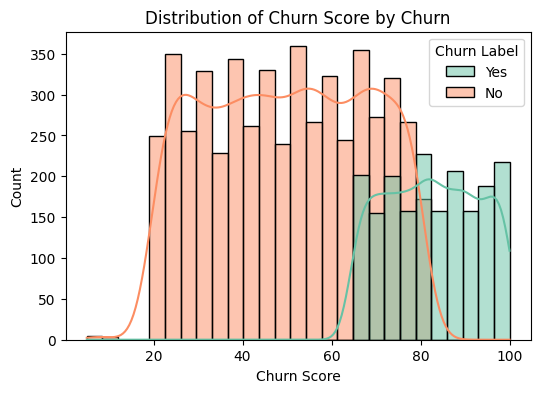

In [12]:
# ==============================
# 📌 6. Numerical Feature Distribution
# ==============================
num_cols = ['Tenure Months','Monthly Charges','Total Charges','CLTV','Churn Score']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_clean, x=col, hue="Churn Label", kde=True, palette='Set2')
    plt.title(f"Distribution of {col} by Churn")
    plt.show()


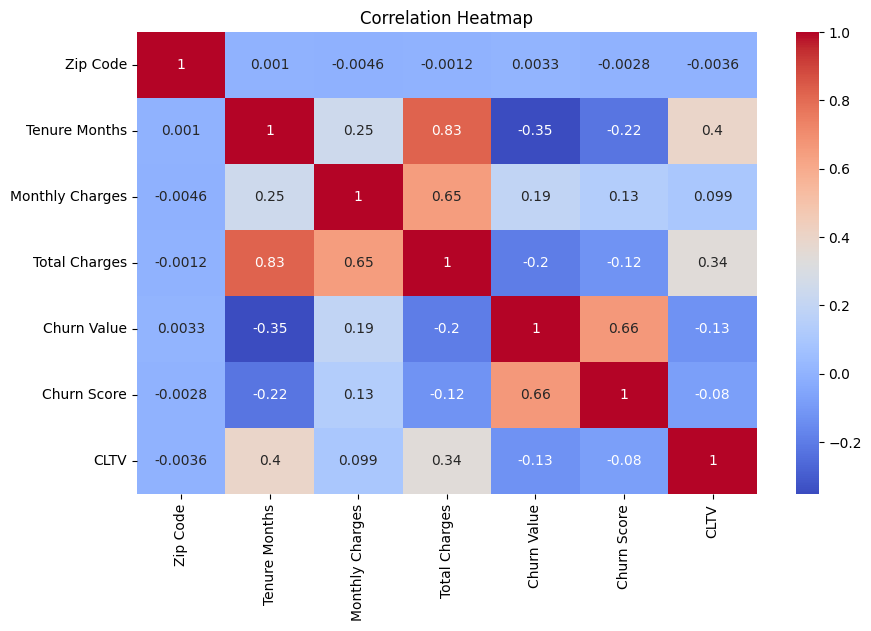

In [13]:
# ==============================
# 📌 7. Correlation Heatmap
# ==============================
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

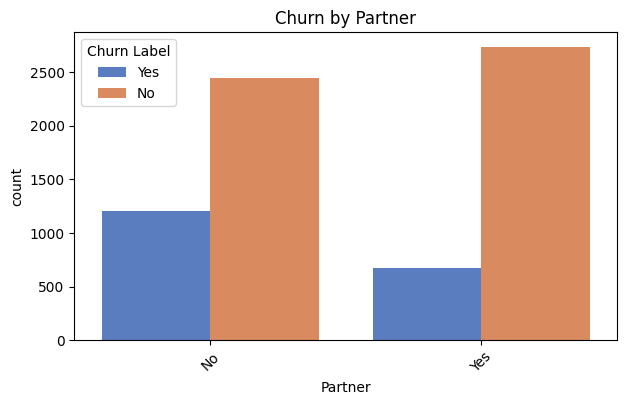

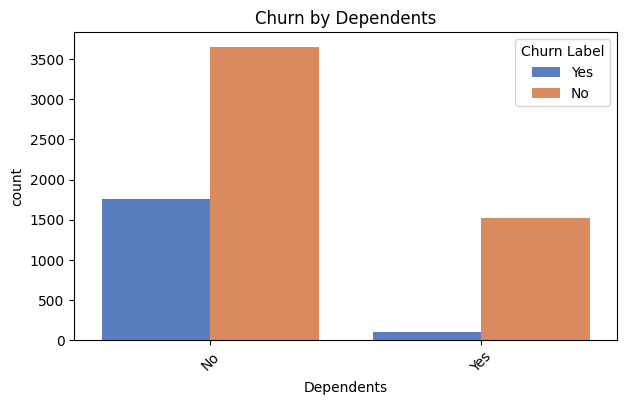

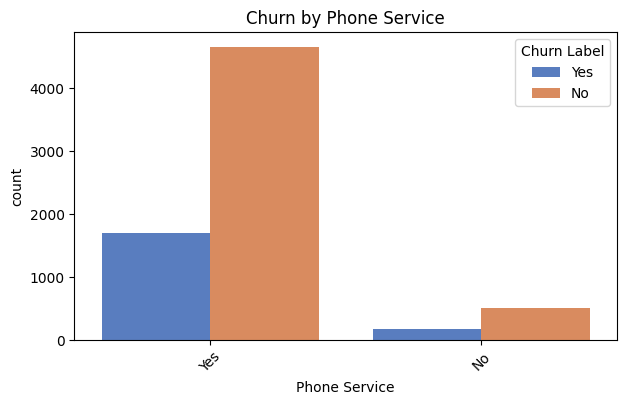

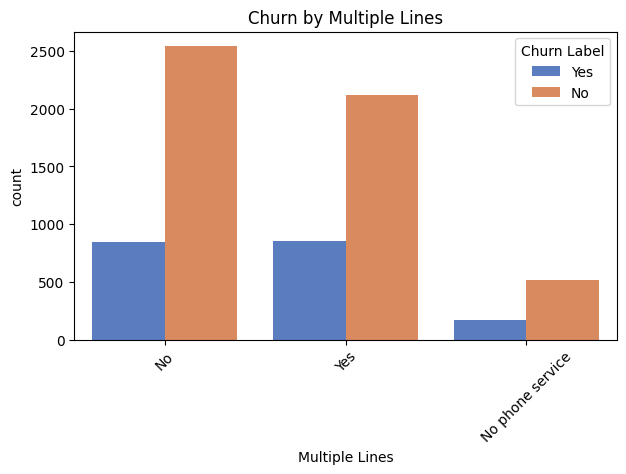

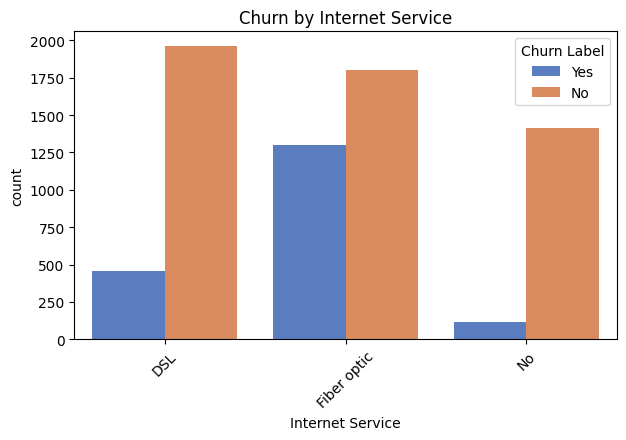

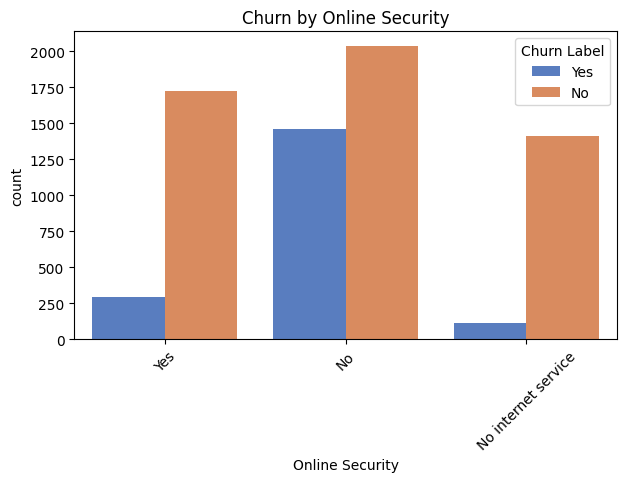

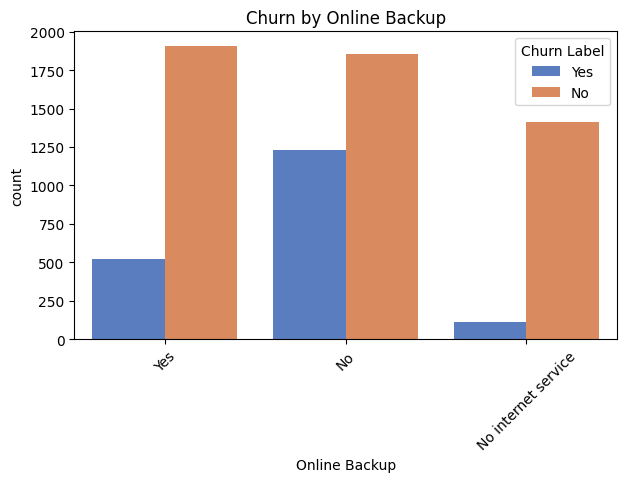

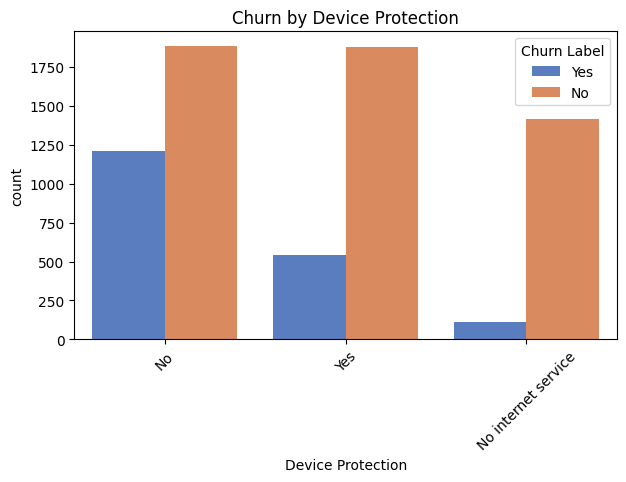

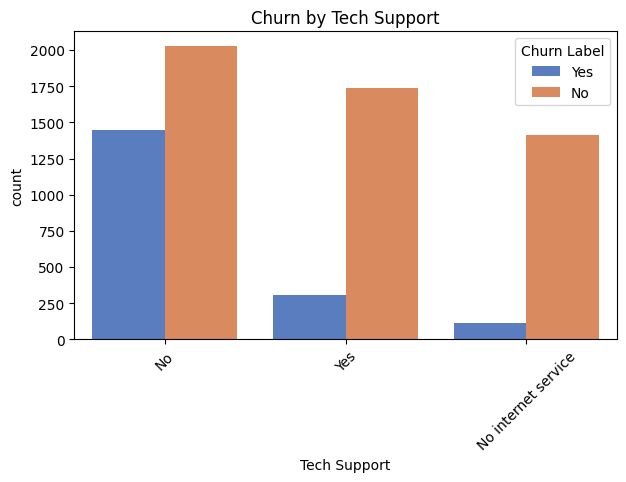

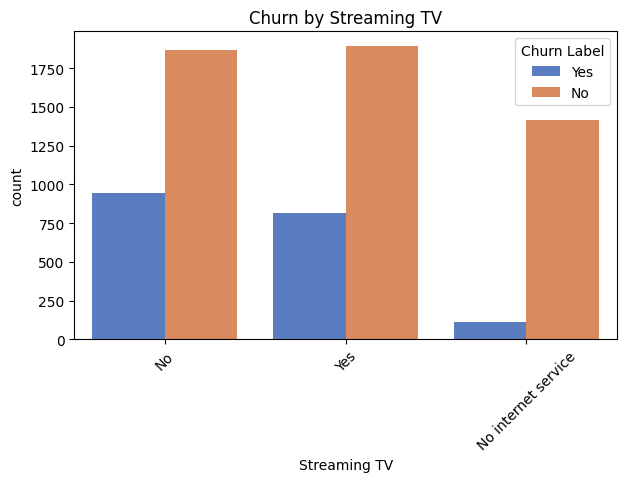

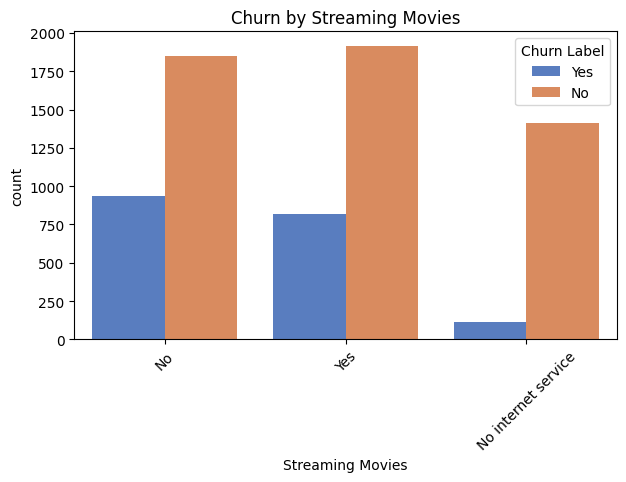

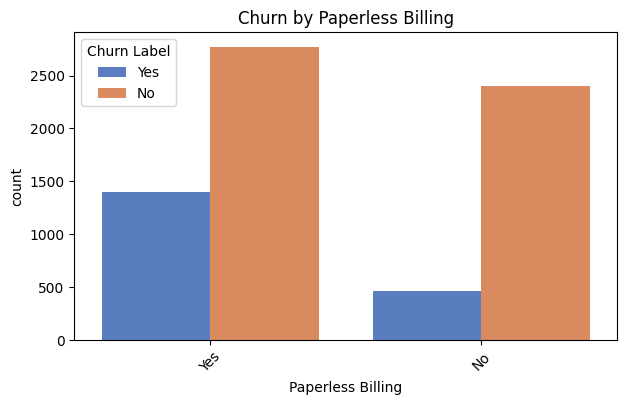

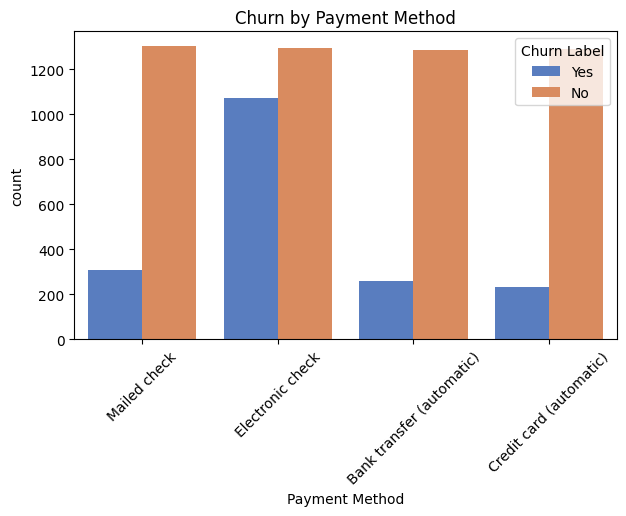

In [14]:
# ==============================
# 📌 8. Churn Rate by Categorical Features
# ==============================
cat_cols = ['Partner','Dependents','Phone Service','Multiple Lines','Internet Service',
            'Online Security','Online Backup','Device Protection','Tech Support',
            'Streaming TV','Streaming Movies','Paperless Billing','Payment Method']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df_clean, x=col, hue='Churn Label', palette='muted')
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# =========================================
# 3) Light cleaning for modeling
#    (keep this in sync with your EDA cleaning)
# =========================================
# Convert Total Charges to numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [16]:
# =========================================
# 3) Light cleaning for modeling
#    (keep this in sync with your EDA cleaning)
# =========================================
# Convert Total Charges to numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Fill missing numeric with median
num_cols_all = ["Tenure Months","Monthly Charges","Total Charges","CLTV","Churn Score"]
for c in num_cols_all:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

# Drop obviously non-predictive IDs / geos (you can tweak)
drop_cols = [c for c in ["CustomerID","Count","Lat Long","Latitude","Longitude","Churn Reason"] if c in df.columns]
df_model = df.drop(columns=drop_cols)

# Ensure target is present and binary
target_col = "Churn Label"
assert target_col in df_model.columns, f"Target column '{target_col}' not found."

# Make target 1/0
df_model[target_col] = df_model[target_col].astype(str).str.strip().str.lower().map({"yes":1, "no":0})

# If there are any missing labels, drop them
df_model = df_model.dropna(subset=[target_col]).copy()
df_model[target_col] = df_model[target_col].astype(int)

In [17]:
# =========================================
# 4) Split X, y
# =========================================
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

# Identify dtypes for preprocessing
numeric_features = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
categorical_features = [c for c in X.columns if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['Zip Code', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']
Categorical features: ['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [18]:
# =========================================
# 5) Preprocessing: scale numeric + one-hot encode categoricals
# =========================================
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)


In [19]:
# =========================================
# 6) Train/Validation split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# =========================================
# 7) Models & Pipelines
# =========================================
# Logistic Regression (good baseline, class_weight helps imbalance)
log_reg = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=200, class_weight="balanced"))
])

# Random Forest (non-linear)
rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

In [21]:
# =========================================
# 8) Hyperparameter search
#    (quick grids—expand if you want more thorough tuning)
# =========================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_params = {
    "clf__C": [0.1, 1.0, 5.0],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs", "liblinear"]
}

rf_params = {
    "clf__n_estimators": [200, 400],
    "clf__max_depth": [None, 6, 10],
    "clf__min_samples_split": [2, 10],
    "clf__min_samples_leaf": [1, 4]
}

gs_log = GridSearchCV(
    estimator=log_reg, param_grid=log_reg_params,
    scoring="roc_auc", cv=cv, n_jobs=-1, verbose=0
)
gs_rf = GridSearchCV(
    estimator=rf, param_grid=rf_params,
    scoring="roc_auc", cv=cv, n_jobs=-1, verbose=0
)

print("Tuning Logistic Regression...")
gs_log.fit(X_train, y_train)
print("Best Logistic params:", gs_log.best_params_)
print("Best Logistic CV AUC:", gs_log.best_score_)

print("\nTuning Random Forest...")
gs_rf.fit(X_train, y_train)
print("Best RF params:", gs_rf.best_params_)
print("Best RF CV AUC:", gs_rf.best_score_)


Tuning Logistic Regression...
Best Logistic params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best Logistic CV AUC: 1.0

Tuning Random Forest...
Best RF params: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 400}
Best RF CV AUC: 0.9999688920757283



=== Logistic Regression Test Performance ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC AUC  : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1035
           1     1.0000    1.0000    1.0000       374

    accuracy                         1.0000      1409
   macro avg     1.0000    1.0000    1.0000      1409
weighted avg     1.0000    1.0000    1.0000      1409



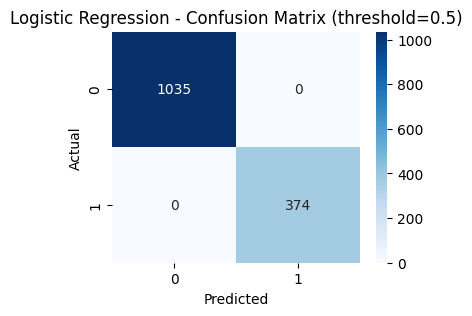

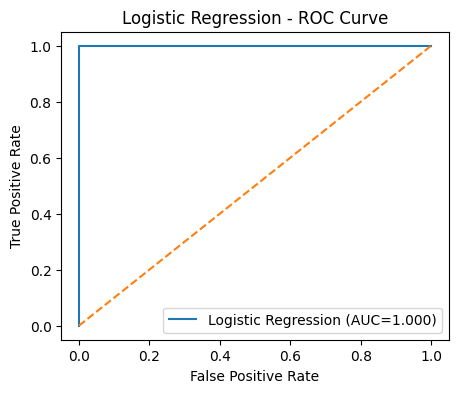


=== Random Forest Test Performance ===
Accuracy : 0.9894
Precision: 1.0000
Recall   : 0.9599
F1-score : 0.9795
ROC AUC  : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0     0.9857    1.0000    0.9928      1035
           1     1.0000    0.9599    0.9795       374

    accuracy                         0.9894      1409
   macro avg     0.9929    0.9799    0.9862      1409
weighted avg     0.9895    0.9894    0.9893      1409



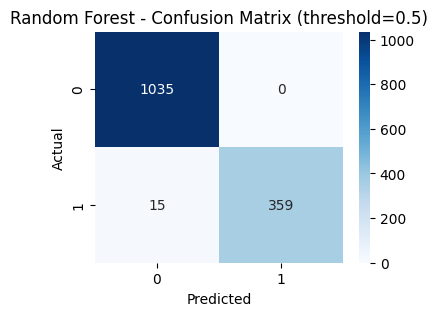

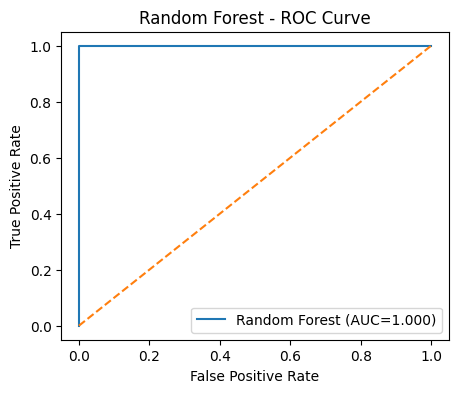

In [22]:
# =========================================
# 9) Evaluate on test set
# =========================================
def evaluate_model(name, fitted_gs, X_test, y_test):
    y_prob = fitted_gs.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\n=== {name} Test Performance ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix (threshold=0.5)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.show()

    return {"name": name, "auc": auc, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "probs": y_prob}

res_log = evaluate_model("Logistic Regression", gs_log, X_test, y_test)
res_rf  = evaluate_model("Random Forest", gs_rf, X_test, y_test)

In [23]:
# =========================================
# 10) Pick the best model and save it
# =========================================
best = max([res_log, res_rf], key=lambda d: d["auc"])
best_name = best["name"]
best_gs = gs_log if best_name == "Logistic Regression" else gs_rf

print(f"\nBest model by AUC: {best_name}")
joblib.dump(best_gs.best_estimator_, f"{best_name.replace(' ','_').lower()}_churn_model.joblib")
print(f"Saved to: {best_name.replace(' ','_').lower()}_churn_model.joblib")


Best model by AUC: Logistic Regression
Saved to: logistic_regression_churn_model.joblib


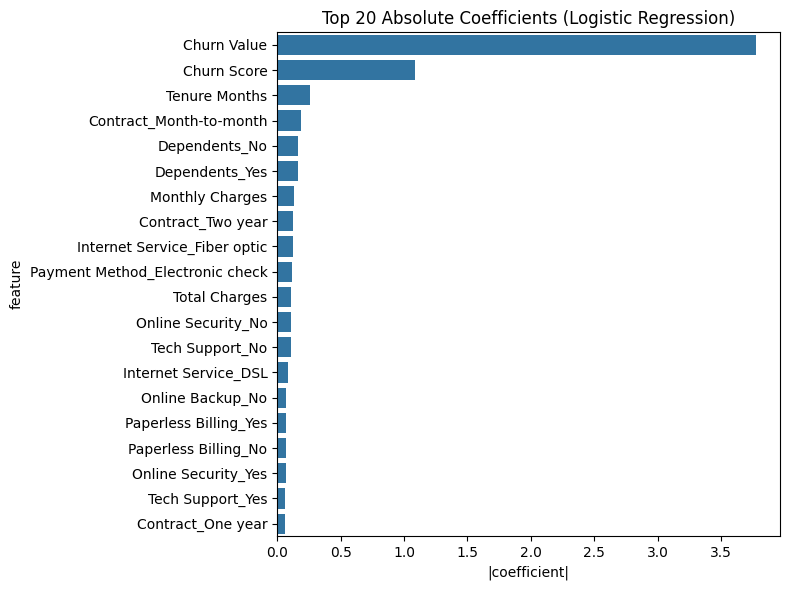

In [ ]:
# =========================================
# 11) (Optional) Feature Importance / Coefficients
#     - For RF: permutation / built-in importance (on transformed features)
#     - For Logistic: coefficients (need feature names after OHE)
# =========================================
# Get transformed feature names for interpretability
ohe = best_gs.best_estimator_.named_steps["preprocess"].named_transformers_["cat"]
num_names = numeric_features
cat_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = num_names + cat_names

if best_name == "Random Forest":
    # Extract underlying RF
    rf_model = best_gs.best_estimator_.named_steps["clf"]
    importances = rf_model.feature_importances_
    fi = pd.DataFrame({"feature": all_feature_names, "importance": importances}).sort_values("importance", ascending=False).head(20)

    plt.figure(figsize=(8,6))
    sns.barplot(data=fi, x="importance", y="feature")
    plt.title("Top 20 Feature Importances (Random Forest)")
    plt.tight_layout()
    plt.show()

else:
    # Logistic coefficients
    lr_model = best_gs.best_estimator_.named_steps["clf"]
    coefs = lr_model.coef_.flatten()
    coef_df = pd.DataFrame({"feature": all_feature_names, "coef": coefs})
    coef_df["abs_coef"] = coef_df["coef"].abs()
    coef_top = coef_df.sort_values("abs_coef", ascending=False).head(20)

    plt.figure(figsize=(8,6))
    sns.barplot(data=coef_top, x="abs_coef", y="feature")
    plt.title("Top 20 Absolute Coefficients (Logistic Regression)")
    plt.xlabel("|coefficient|")
    plt.tight_layout()
    plt.show()


,thr,accuracy,precision,recall,f1
0,0.20,1.0,1.0,1.0,1.0
1,0.25,1.0,1.0,1.0,1.0
2,0.30,1.0,1.0,1.0,1.0
3,0.35,1.0,1.0,1.0,1.0
4,0.40,1.0,1.0,1.0,1.0
5,0.45,1.0,1.0,1.0,1.0
6,0.50,1.0,1.0,1.0,1.0
7,0.55,1.0,1.0,1.0,1.0
8,0.60,1.0,1.0,1.0,1.0
9,0.65,1.0,1.0,1.0,1.0


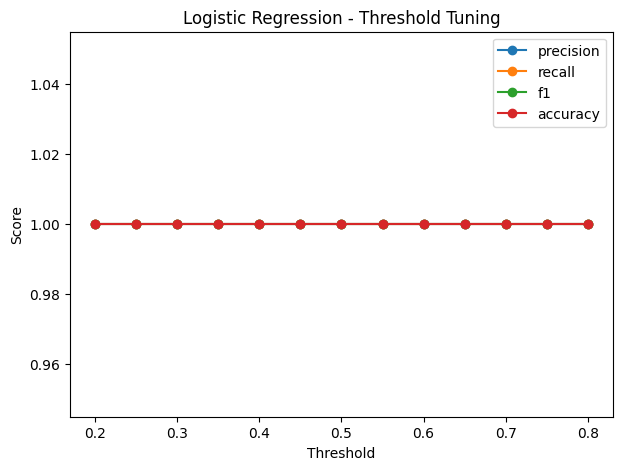

In [27]:
# =========================================
# 12) (Optional) Threshold tuning to boost recall/precision tradeoff
# =========================================
def evaluate_threshold(y_true, y_prob, thr):
    y_pred_t = (y_prob >= thr).astype(int)
    return {
        "thr": thr,
        "accuracy": accuracy_score(y_true, y_pred_t),
        "precision": precision_score(y_true, y_pred_t, zero_division=0),
        "recall": recall_score(y_true, y_pred_t, zero_division=0),
        "f1": f1_score(y_true, y_pred_t, zero_division=0)
    }

thresholds = np.linspace(0.2, 0.8, 13)
t_metrics = pd.DataFrame([evaluate_threshold(y_test, best["probs"], t) for t in thresholds])

display(t_metrics)

plt.figure(figsize=(7,5))
for m in ["precision","recall","f1","accuracy"]:
    plt.plot(t_metrics["thr"], t_metrics[m], marker="o", label=m)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f"{best_name} - Threshold Tuning")
plt.legend()
plt.show()

In [7]:
import joblib
import pandas as pd

# Load the saved pipeline
model = joblib.load("logistic_regression_churn_model.joblib")   # or logistic_regression_churn_model.joblib


In [9]:
file_path = "Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

# Recreate df_model (same preprocessing as before)
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())

drop_cols = ["CustomerID","Count","Lat Long","Latitude","Longitude","Churn Reason"]
df_model = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Ensure target column not used
X = df_model.drop(columns=["Churn Label"])

In [10]:
# Example: take a few rows from original dataset
test_data = df_model.drop(columns=["Churn Label"]).sample(5, random_state=42)

print(test_data.head())


            Country       State          City  Zip Code  Gender  \
185   United States  California         Keene     93531  Female   
2715  United States  California      Stockton     95207    Male   
3825  United States  California   San Leandro     94579  Female   
1807  United States  California  Sherman Oaks     91423    Male   
132   United States  California      Murrieta     92563    Male   

     Senior Citizen Partner Dependents  Tenure Months Phone Service  ...  \
185              No      No         No             15           Yes  ...   
2715             No     Yes         No             18           Yes  ...   
3825             No      No         No              2           Yes  ...   
1807            Yes     Yes         No              6           Yes  ...   
132              No      No         No             40           Yes  ...   

             Streaming TV     Streaming Movies        Contract  \
185                    No                  Yes  Month-to-month   
2715    

In [11]:
# Predict churn (0 = No, 1 = Yes)
y_pred = model.predict(test_data)

# Predict probabilities (how likely to churn)
y_prob = model.predict_proba(test_data)[:, 1]

for i, (pred, prob) in enumerate(zip(y_pred, y_prob)):
    print(f"Customer {i+1}: Churn={pred}, Probability={prob:.3f}")


Customer 1: Churn=1, Probability=0.998
Customer 2: Churn=0, Probability=0.009
Customer 3: Churn=0, Probability=0.003
Customer 4: Churn=1, Probability=0.995
Customer 5: Churn=1, Probability=0.995


In [17]:
import pandas as pd
import joblib

# Reload dataset
df = pd.read_excel("Telco_customer_churn.xlsx")

# Same preprocessing as before
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())

drop_cols = ["CustomerID","Count","Lat Long","Latitude","Longitude","Churn Reason"]
df_model = df.drop(columns=[c for c in drop_cols if c in df.columns])

X = df_model.drop(columns=["Churn Label"])

# Load model
model = joblib.load("logistic_regression_churn_model.joblib")

# Pick 5 random customers
test_data = X.sample(5, random_state=42)

print(model.predict(test_data))
print(model.predict_proba(test_data)[:, 1])


[1 0 0 1 1]
[0.99792923 0.00867655 0.00251201 0.99502889 0.99517973]
